<a href="https://colab.research.google.com/github/v2047/Data-Analysis/blob/main/Netflix_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [193]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import csv


In [194]:
# Load the data
dt_net = pd.read_csv("/content/8. Netflix Dataset (2).csv")

print(dt_net)

     Show_Id Category                                    Title  \
0         s1  TV Show                                       3%   
1         s2    Movie                                    07:19   
2         s3    Movie                                    23:59   
3         s4    Movie                                        9   
4         s5    Movie                                       21   
...      ...      ...                                      ...   
7784   s7783    Movie                                     Zozo   
7785   s7784    Movie                                   Zubaan   
7786   s7785    Movie                        Zulu Man in Japan   
7787   s7786  TV Show                    Zumbo's Just Desserts   
7788   s7787    Movie  ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS   

               Director                                               Cast  \
0                   NaN  João Miguel, Bianca Comparato, Michel Gomes, R...   
1     Jorge Michel Grau  Demián Bichir, Héctor Boni

In [195]:
dt_net.shape

(7789, 11)

In [196]:
dt_net.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [197]:
dt_net.columns


Index(['Show_Id', 'Category', 'Title', 'Director', 'Cast', 'Country',
       'Release_Date', 'Rating', 'Duration', 'Type', 'Description'],
      dtype='object')

In [198]:
dt_net.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [199]:
# CHECKING DUPLICATE 
dt_net[dt_net.duplicated()]

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
6300,s684,Movie,Backfire,Dave Patten,"Black Deniro, Byron ""Squally"" Vinson, Dominic ...",United States,"April 5, 2019",TV-MA,97 min,"Dramas, Independent Movies, Thrillers",When two would-be robbers accidentally kill a ...
6622,s6621,Movie,The Lost Okoroshi,Abba T. Makama,"Seun Ajayi, Judith Audu, Tope Tedela, Ifu Enna...",Nigeria,"September 4, 2020",TV-MA,94 min,"Comedies, Dramas, Independent Movies",A disillusioned security guard transforms into...


In [200]:
#REMOVING DUPLICATE
dt_net.drop_duplicates(inplace= True)

# Checking duplicate removed or not 
dt_net[dt_net.duplicated()]



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description


In [201]:
# Checking null values 
dt_net.isnull().sum()

Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64

<Axes: >

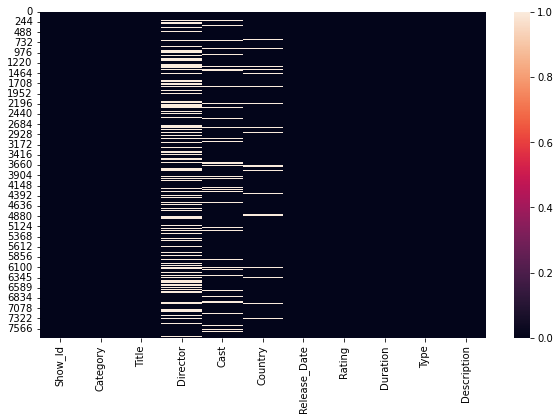

In [202]:
# using heat map to show null value count 
plt.figure(figsize =[10,6]) 
sns.heatmap(dt_net.isnull())

In [203]:
# For ‘Zindagi Na Milegi Dobara’ what is show idd and who is the director of this show?


dt_net[dt_net['Title'].isin(['Zindagi Na Milegi Dobara'])]
 



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
7771,s7770,Movie,Zindagi Na Milegi Dobara,Zoya Akhtar,"Hrithik Roshan, Abhay Deol, Farhan Akhtar, Kat...",India,"December 15, 2019",TV-14,154 min,"Comedies, Dramas, International Movies",Three friends on an adventurous road trip/bach...


In [204]:
# In which year highest number of TV Shows and Movies were released? Show with bar graph.
# first we need to format release date 
dt_net['Date'] = pd.to_datetime(dt_net['Release_Date'])
dt_net.head()



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01


In [205]:
dt_net['Date'].dt.year.value_counts()

2019.0    2153
2020.0    2009
2018.0    1685
2017.0    1225
2016.0     443
2021.0     117
2015.0      88
2014.0      25
2011.0      13
2013.0      11
2012.0       3
2008.0       2
2009.0       2
2010.0       1
Name: Date, dtype: int64

<Axes: >

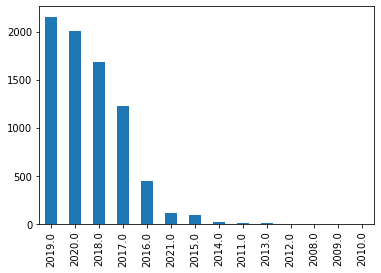

In [206]:
# Above data in bar chart 
dt_net['Date'].dt.year.value_counts().plot(kind='bar')


<Axes: >

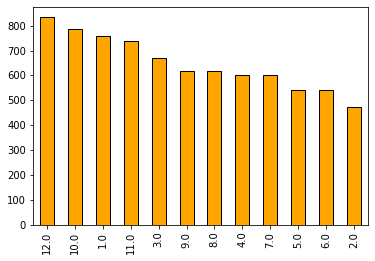

In [207]:
# Month count 
dt_net['Date'].dt.month.value_counts()
dt_net['Date'].dt.month.value_counts().plot(kind='bar', color = 'orange', edgecolor = 'black')



<Axes: >

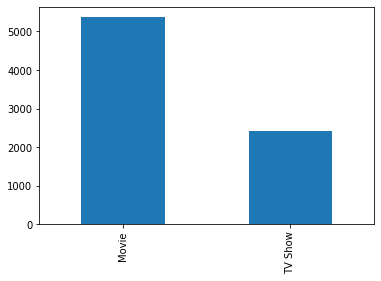

In [208]:
# How many movies and shows are in the dataset? Show with the bar graph.
dt_net['Category'].value_counts()
dt_net['Category'].value_counts().plot(kind='bar')




In [209]:
# Show all the Movies that were released in 2016.
dt_net['Year'] = dt_net['Date'].dt.year
dt_net.head(2)

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,2020.0
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0


In [210]:
dt_net[(dt_net['Category'] == 'Movie') & (dt_net['Year']== 2016)]



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
25,s26,Movie,(T)ERROR,"Lyric R. Cabral, David Felix Sutcliffe",NaN,United States,"June 30, 2016",NR,84 min,Documentaries,This real-life look at FBI counterterrorism op...,2016-06-30,2016.0
35,s36,Movie,#Rucker50,Robert McCullough Jr.,NaN,United States,"December 1, 2016",TV-PG,56 min,"Documentaries, Sports Movies",This documentary celebrates the 50th anniversa...,2016-12-01,2016.0
59,s60,Movie,1000 Rupee Note,Shrihari Sathe,"Usha Naik, Sandeep Pathak, Shrikant Yadav, Gan...",India,"December 1, 2016",TV-14,89 min,"Dramas, International Movies",After randomly receiving a handsome political ...,2016-12-01,2016.0
62,s63,Movie,13 Cameras,Victor Zarcoff,"PJ McCabe, Brianne Moncrief, Sarah Baldwin, Ji...",United States,"August 13, 2016",NR,90 min,"Horror Movies, Independent Movies, Thrillers",Young parents-to-be Claire and Ryan move into ...,2016-08-13,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7715,s7714,Movie,Yo-Kai Watch: The Movie,Mark Risley,"Johnny Yong Bosch, Joey D'Auria, Alicyn Packar...","Japan, United States","December 1, 2016",TV-Y7,96 min,"Anime Features, Children & Family Movies",Nate's special Yo-Kai Watch is missing. He tra...,2016-12-01,2016.0
7716,s7715,Movie,Yoga Hosers,Kevin Smith,"Harley Quinn Smith, Lily-Rose Depp, Johnny Dep...",United States,"December 2, 2016",PG-13,88 min,"Comedies, Horror Movies, Independent Movies",With an all-important high school party at sta...,2016-12-02,2016.0
7728,s7727,Movie,You Carry Me,Ivona Juka,"Lana Baric, Vojislav Brajovic, Natasa Janjic, ...","Croatia, Slovenia, Serbia, Montenegro","July 1, 2016",TV-MA,157 min,"Dramas, International Movies","A soap opera producer, director and makeup art...",2016-07-01,2016.0
7739,s7738,Movie,Young Tiger,Mu Chu,"Qiu Yuen, Charlie Chin, Jackie Chan, Hu Chin, ...",Hong Kong,"November 1, 2016",NR,81 min,"Action & Adventure, International Movies","Aided only by a tough female police officer, a...",2016-11-01,2016.0


In [211]:
# Show only the titles of all the TV Shows that were released in India.
dt_net[(dt_net['Category'] == 'TV Show') & (dt_net['Country'] == 'India')]['Title']



86            21 Sarfarosh: Saragarhi 1897
132                              7 (Seven)
340                           Agent Raghav
364                           Akbar Birbal
533                    Anjaan: Rural Myths
                       ...                
6249                  The Creative Indians
6400    The Golden Years with Javed Akhtar
6469                The House That Made Me
7294                            Typewriter
7705                       Yeh Meri Family
Name: Title, Length: 71, dtype: object

In [212]:
# Show top 5 directors who gave highest number of TV Shows and Movies to Netflix.
dt_net['Director'].value_counts().head()

Raúl Campos, Jan Suter    18
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Jay Chapman               12
Name: Director, dtype: int64

In [213]:
# Show all the records where ‘Category is Movies and Type is Comedies’ or ‘Country is India.
dt_net[(dt_net['Category'] == 'Movie') & (dt_net['Type']== 'Comedies') | (dt_net['Country']== 'India')].head()



,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01,2019.0
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15,2017.0
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29,2019.0
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018-09-01,2018.0
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018-09-15,2018.0


In [214]:
# Drop the null value 
new_dt_net = dt_net.dropna()
new_dt_net.head()

,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,2016.0
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12-20,2018.0
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11-16,2017.0
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01-01,2020.0
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,"July 1, 2017",TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07-01,2017.0


In [215]:
  # In how many TV Shows/Movies Rajneesh Duggal was casted?
  new_dt_net[new_dt_net['Cast'].str.contains('Rajneesh Duggal')]




,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,"December 15, 2017",TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12-15,2017.0
816,s817,Movie,Beiimaan Love,Rajeev Chaudhari,"Sunny Leone, Rajneesh Duggal, Rajeev Verma, Da...",India,"November 1, 2017",TV-MA,115 min,"Dramas, International Movies, Romantic Movies",After having her heart broken by a man who sed...,2017-11-01,2017.0
3507,s3508,Movie,Laal Rang,Syed Ahmad Afzal,"Randeep Hooda, Piaa Bajpai, Jaihind Kumar, Aks...",India,"March 1, 2018",TV-14,143 min,"Dramas, International Movies, Thrillers","Eager for cash, Rajesh joins his friend Shanka...",2018-03-01,2018.0


In [216]:
# What are the different rating defined by Netflix, and how many Movies got TV-14 Rating in India?
# rating defined by Netflix
#new_dt_net['Rating'].unique()

#how many Movies got TV-14 Rating in India?
new_dt_net[(new_dt_net['Rating'] == 'TV-14') & (new_dt_net['Country']  == 'India') ].head()


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description,Date,Year
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,"April 1, 2019",TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04-01,2019.0
18,s19,Movie,15-Aug,Swapnaneel Jayakar,"Rahul Pethe, Mrunmayee Deshpande, Adinath Koth...",India,"March 29, 2019",TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",2019-03-29,2019.0
20,s21,Movie,​​Kuch Bheege Alfaaz,Onir,"Geetanjali Thapa, Zain Khan Durrani, Shray Rai...",India,"September 1, 2018",TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,2018-09-01,2018.0
21,s22,Movie,​Goli Soda 2,Vijay Milton,"Samuthirakani, Bharath Seeni, Vinoth, Esakki B...",India,"September 15, 2018",TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",2018-09-15,2018.0
22,s23,Movie,​Maj Rati ​​Keteki,Santwana Bardoloi,"Adil Hussain, Shakil Imtiaz, Mahendra Rabha, S...",India,"September 15, 2018",TV-14,117 min,"Dramas, International Movies",A successful writer returns to the town that l...,2018-09-15,2018.0


In [217]:
# Which country has the highest no. of TV Shows? Show with the bar graph.
Dataset_with_TVShows = new_dt_net[(new_dt_net['Category'] == 'TV Show')]
Dataset_with_TVShows.head()
Dataset_with_TVShows['Country'].value_counts



<bound method IndexOpsMixin.value_counts of 5                                       Turkey
132                                      India
218                                     Brazil
260                                      Japan
276                      United States, Canada
                         ...                  
7387                                     Spain
7402                                     Spain
7494    United Kingdom, Ireland, United States
7668                      Italy, United States
7723                             United States
Name: Country, Length: 136, dtype: object>

In [218]:
Dataset_with_TVShows['Country'].value_counts()

United States                                                    27
United Kingdom                                                   19
Japan                                                            10
South Korea                                                      10
Spain                                                             7
Taiwan                                                            6
Turkey                                                            5
India                                                             5
Brazil                                                            4
Canada                                                            3
Thailand                                                          3
Nigeria                                                           3
France                                                            3
China                                                             2
Italy                                           

<Axes: >

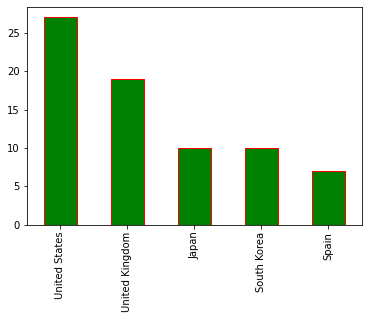

In [219]:
Dataset_with_TVShows['Country'].value_counts().head().plot(kind='bar',color ='Green', edgecolor = 'red')